# **The Sparks Foundation**
### Task 1: Predict the percentage of an student based on the no. of study hours.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# **Reading the File and displaying Info, Columns etc it has**

In [2]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [15]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# **Finding Null Values**

In [7]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


# **Using Graph to Display if Null Values Present or Not (An attractive Way)**

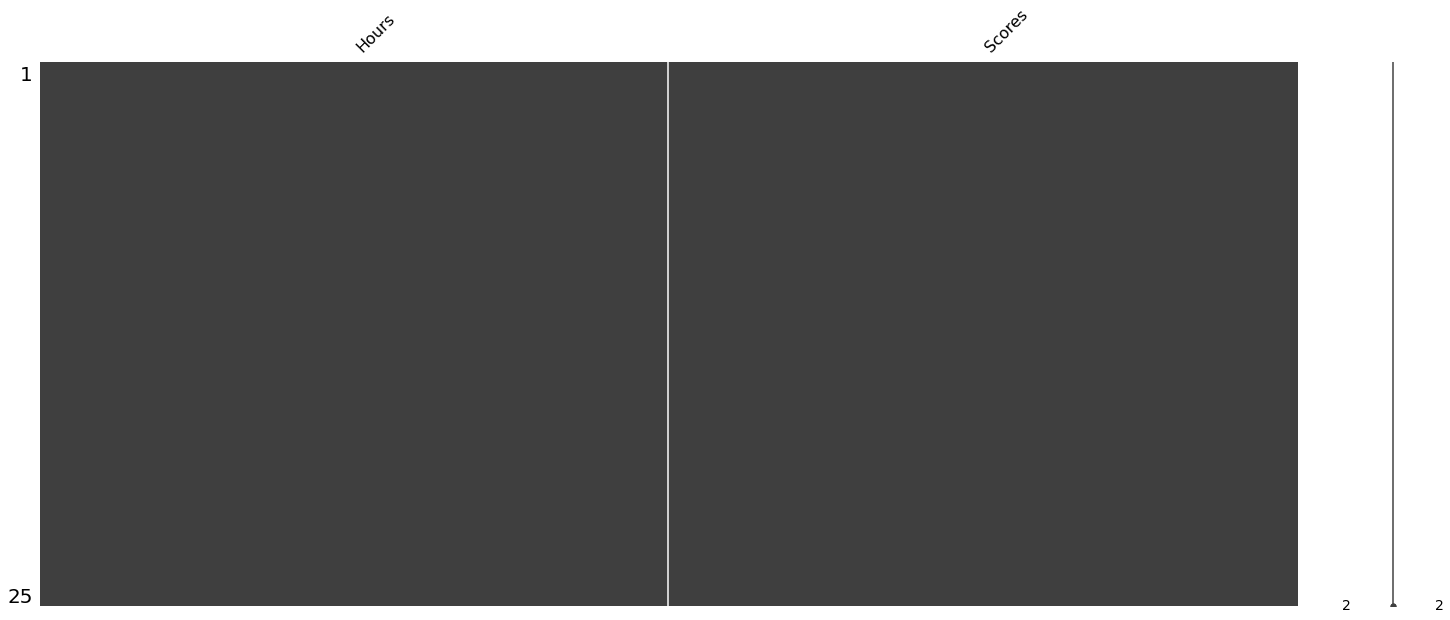

In [8]:
import missingno as ms
ms.matrix(df)

We can see there are No Null Values

# **Displaying Data through Graph**

In [16]:
hrs = df['Hours']
scores = df['Scores']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


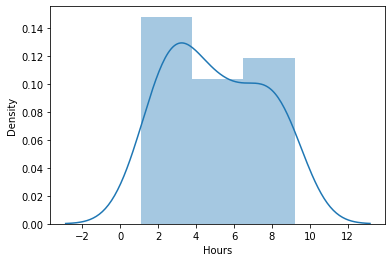

In [17]:
sb.distplot(hrs)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


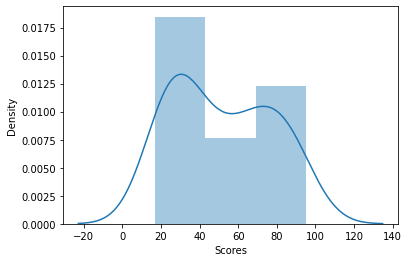

In [18]:
sb.distplot(scores)

Here we can see out as there are no outliers in this and data is in the range

# **Splitting Dataset into Training Set and Test Set**

In [9]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [11]:
print(X_train)

[[7.7]
 [6.1]
 [7.4]
 [3.5]
 [3.2]
 [2.7]
 [9.2]
 [5.5]
 [3.8]
 [5.1]
 [2.5]
 [2.5]
 [8.9]
 [7.8]
 [6.9]
 [2.7]
 [8.3]
 [4.5]
 [5.9]
 [1.5]]


In [12]:
print(Y_train)

[85 67 69 30 27 30 88 60 35 47 30 21 95 86 76 25 81 41 62 20]


In [13]:
print(X_test)

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]]


In [14]:
print(Y_test)

[17 42 24 75 54]


# **Using Simple Linear Reggression**

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting Values

In [34]:
y_pred = regressor.predict(X_test)
print('Predicted Values : ', y_pred)
print('Target Values : ', Y_test)

Predicted Values :  [ 9.97026179 32.98470004 18.33914843 87.38246316 48.67636248]
Target Values :  [17 42 24 75 54]


# Displaying Training Set Result

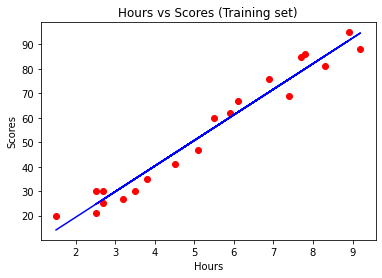

In [22]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Displaying Test Set Results

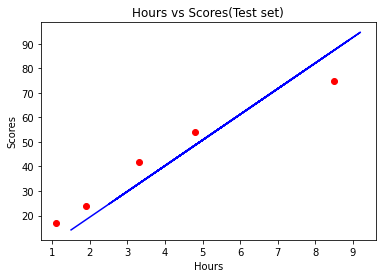

In [24]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Scores(Test set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## What will be the score if a student studies for 9.25 hours daily ? 

In [36]:
hr = 9.25
sr = regressor.predict([[hr]])
print('If student studies for {} hours per day, he/she will score {} percentage in his exam.'.format(hr,sr))

If student studies for 9.25 hours per day, he/she will score [95.22829438] percentage in his exam.


# **Evaluating Model**

In [35]:
from sklearn import metrics
from sklearn.metrics import r2_score
Accuracy = r2_score(Y_test, y_pred)
print('Accuracy Score = ', Accuracy)
m = metrics.mean_absolute_error(Y_test, y_pred)
print('Mean Absolute Error = ', m)

Accuracy Score =  0.8421031525243527
Mean Absolute Error =  7.882398086270432
